## Project
1. Question

    How would fish population change if a new predator were introduced?
    This matters because it would inform people about the dangers of invasive species, and also fisherman would care a lot about 
    a decline in fish population
    
2. Model

    Number of fish
    Number of fish and fish eggs consumed by predator
    Natural birth and death rate of fish
    Predator birth and death rate?
    Updating number of fish and predators action
    Metrics: Number of fish still alive after predators introduced (as %?)
    
3. Results

    Number of fish and number of predators are expected to be inveresely proportional
    But maybe there is also the added complexity of predators increase so fish decline so predators decline so fish increase
    
4. Interpretation

    By inputting different numbers of predators we could see how many fish make up the population


## Question
Our question for this model was "How will the initial number of predators introduced impact the future population of prey? (specifically at what time will the prey population reach zero)"





In [4]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline
# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'
# import functions from the modsim.py module
from modsim import *
from pandas import read_html

In [47]:
def update(r_pop, y_pop):
    if y_pop>250:
        y_pop = 250
    elif y_pop>200:
        y_pop = ((250/y_pop)-1) + y_pop
    elif y_pop>40:
        y_pop = (0.03*y_pop)-(0.0005*y_pop*r_pop) + y_pop #updates the prey pop using Lotka-Volterra 
    elif y_pop>0:
        y_pop-=0.5
    else:
        y_pop = 0
        
    if r_pop>250:
        r_pop = 250
    elif r_pop>200:
        r_pop = ((250/r_pop)-1) + r_pop
    elif r_pop>10:
        r_pop = (0.0005*y_pop*r_pop - 0.05*r_pop) + r_pop #updates the predators pop using Lotka-Volterra 
    elif r_pop>0:
        r_pop-=0.5
    else:
        r_pop = 0
        
    return r_pop, y_pop #returns values for predator and prey population
    
def run_simulation(system):
    results_y = TimeSeries()
    results_r = TimeSeries()
    results_y[system.t_0] = system.y_initial_pop
    results_r[system.t_0] = system.r_initial_pop

    for t in linrange(system.t_0, system.t_end):
        results_r[t+1], results_y[t+1] = update(results_r[t], results_y[t])
        
    return results_r, results_y
    


In [48]:
def plot_results(results, label):
    """Plot the estimates and the model.
    timeseries: TimeSeries of simulation results
    title: string
    """
    plot(results, label=label)
    
    decorate(xlabel='Time(days)', 
             ylabel='Population',
             title='Time Vs Pop')

## Origional Function from Online Model of Wolves and Rabbits
This graph just shows the original plot of predator vs prey population over time using the same initial values of 100 prey and predators that the model used. We needed to make sure that we could correctly imitate the model before we modified the input 

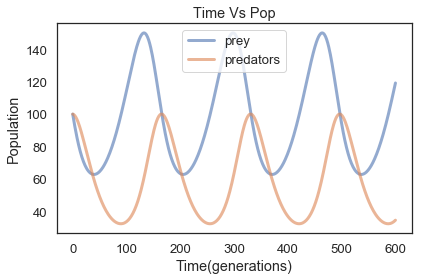

In [32]:
ry_system = System(t_0=0,
               t_end=600,
               y_initial_pop=100,
               r_initial_pop=100
                )
results_r, results_y = run_simulation(ry_system)

plot_results(results_y, 'prey')

decorate(xlabel='Time(days)', 
     ylabel='Prey Population',
     title='Time Vs Prey Pop')

plot_results(results_r, 'predators')

decorate(xlabel='Time(generations)', 
     ylabel='Population',
     title='Time Vs Pop')


## Time Vs Prey Population
Varrying predator population

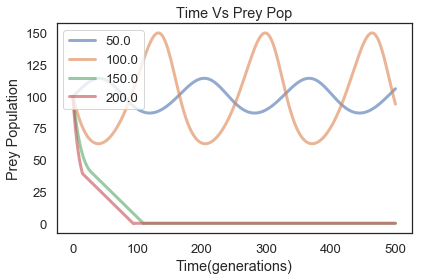

In [49]:
r_initial_pop_array = linrange (50, 200, 50, endpoint=True) 


for r_pop in r_initial_pop_array:
    ry_system = System(t_0=0,
                   t_end=500,
                   y_initial_pop=100,
                   r_initial_pop=r_pop
                    )
    results_r, results_y = run_simulation(ry_system)

    plot_results(results_y, r_pop)
    #print(results_y, r_pop)

    decorate(xlabel='Time(generations)', 
         ylabel='Prey Population',
         title='Time Vs Prey Pop')



## Time Vs Predator Population
Varrying the Predator Population

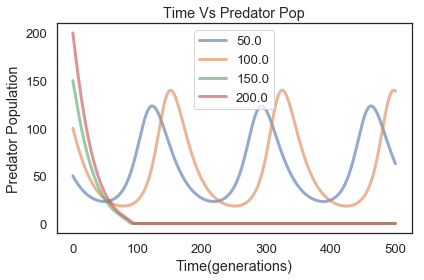

In [50]:
r_initial_pop_array = linrange (50, 200, 50, endpoint=True) 


for r_pop in r_initial_pop_array:
    ry_system = System(t_0=0,
                   t_end=500,
                   y_initial_pop=50,
                   r_initial_pop=r_pop
                    )
    results_r, results_y = run_simulation(ry_system)

    plot_results(results_r, r_pop)
#    print(results_r, r_pop)

    decorate(xlabel='Time(generations)', 
         ylabel='Predator Population',
         title='Time Vs Predator Pop')
